<img width=50 src="https://carbonplan-assets.s3.amazonaws.com/monogram/dark-small.png" style="margin-left:0px;margin-top:20px"/>

# Sample notebook to explore biomass dataset

Authors: Oriana Chegwidden and Cindy Chiao

To run this notebook locally and produce the loveliest-possible figures, you'll
want to have the CarbonPlan styles installed.


In [6]:
import xarray as xr
import pandas as pd
from carbonplan_trace.v0.data import cat, cat_file

from carbonplan_styles.colors import colors
from carbonplan_styles.mpl import set_theme
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

theme = "dark"
set_theme(style=f"carbonplan_{theme}")
c = colors(theme)

## Load in global 1 degree raster


In [2]:
ds = cat.emissions_one_degree().to_dask()


In [3]:
da = (ds.rename({"emissions": "Emissions [Mt CO2]"}) / 1e6)[
    "Emissions [Mt CO2]"
]

## Global map of cumulative emisisons over 2001-2020


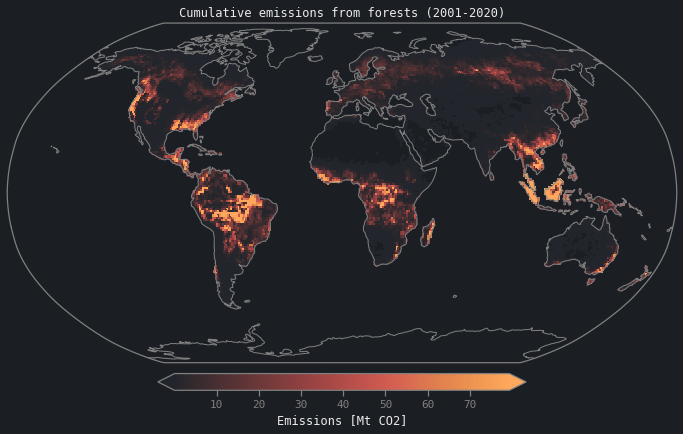

In [5]:
plt.figure(figsize=(12, 10))
s = da.where(da > 0.0)
s = s.where(s > 0)
p = s.plot(
    cmap=f"fire_{theme}",
    subplot_kws=dict(projection=ccrs.Robinson()),
    transform=ccrs.PlateCarree(),
    robust=True,
    cbar_kwargs={"orientation": "horizontal", "pad": 0.02, "shrink": 0.55},
)
p.axes.set_global()
p.axes.coastlines(color=c["secondary"])
p.axes.set_title("Cumulative emissions from forests (2001-2020)")
plt.savefig('global_cumulative.png', dpi=300)

## Load in a sample tile from the underlying 30 m dataset


In [5]:
ds = cat.emissions_30m_partitioned(lat='00N', lon='060W').to_dask()

## Example of forest losses in the Amazon


In [25]:
ds = ds.rename({"emissions": "Emissions [t CO2]"})
sub = ds.sel(lat=slice(-6.225, -6.35), lon=slice(-53.45, -53.35))

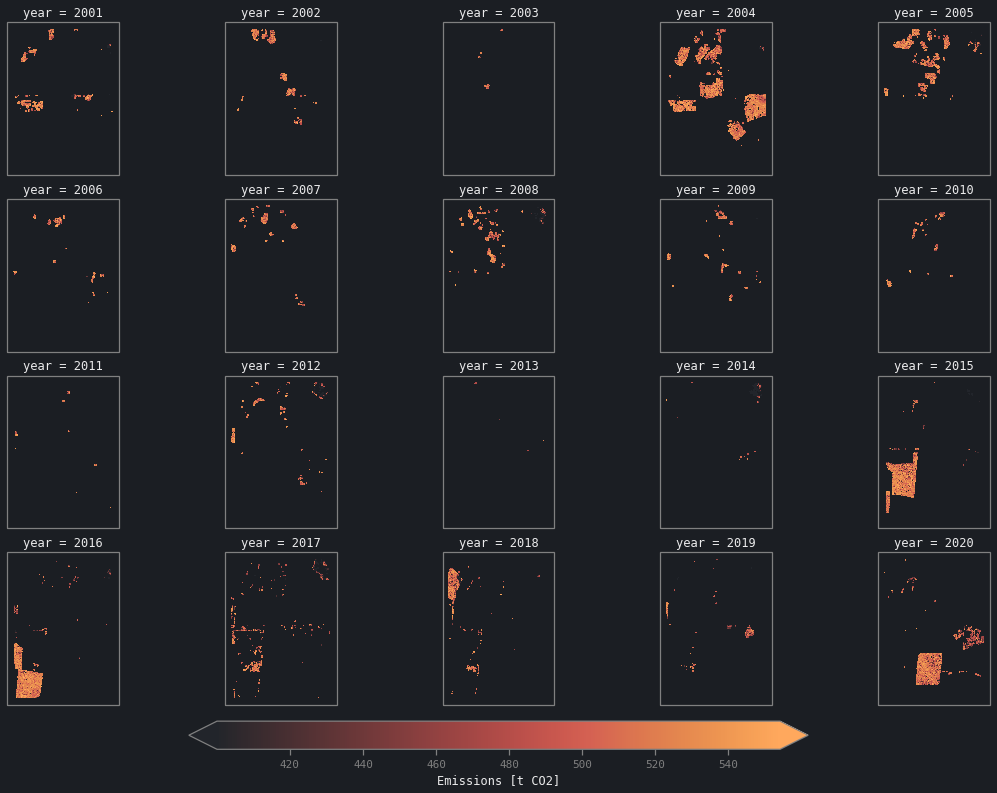

In [27]:
s = sub.where(sub > 0.0)
s["Emissions [t CO2]"].plot(
    col="year",
    col_wrap=5,
    cmap=f"fire_{theme}",
    subplot_kws=dict(projection=ccrs.Robinson()),
    transform=ccrs.PlateCarree(),
    robust=True,
    cbar_kwargs={"orientation": "horizontal", "pad": 0.02, "shrink": 0.55},
)